## Imports

In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from  matplotlib import pyplot as plt
from tensorflow.keras import layers, Input
import splitfolders
from tensorflow.keras.models import Sequential, Model
from keras.layers.core import Dense, Flatten

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


## Splitting the images for train, test, validation

In [10]:
splitfolders.ratio("Mel_spectrograms", seed=137, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 1000 files [00:05, 174.48 files/s]


## Rescaling and creating training data

In [11]:
training_dir = 'output/train'
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)
training_generator = training_datagen.flow_from_directory(training_dir, batch_size = 64, target_size = (150,150),
                                                          class_mode ='categorical')

Found 800 images belonging to 10 classes.


## Rescaling and creating validation data

In [12]:
# Creation of validation inputs
validation_dir = 'output/val'
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size = 64, target_size = (150,150),
                                                          class_mode ='categorical')

Found 100 images belonging to 10 classes.


## Rescaling and creating testing data

In [13]:
test_dir = 'output/test'
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_dir, batch_size = 64, target_size = (150,150),
                                                          class_mode ='categorical')

Found 100 images belonging to 10 classes.


## Running our first CNN layer

In [19]:
model1 = tf.keras.models.Sequential([
    # First CNN layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second CNN layer
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third CNN layer
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth CNN layer
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # We will now flatten our outputs from the previous layers to feed into a subsequent dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), # we have kept the droupout at 50% itself
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 256)       295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 512)       1180160   
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 512)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 512)      

In [22]:
# We will now train our neural net
model_1 = model1.fit(training_generator,
                    epochs = 25,
                    validation_data=validation_generator)

Epoch 1/25
13/13 [==============================] - 67s 5s/step - loss: 2.4678 - accuracy: 0.1150 - val_loss: 2.2873 - val_accuracy: 0.1000
Epoch 2/25
13/13 [==============================] - 83s 6s/step - loss: 2.2082 - accuracy: 0.1838 - val_loss: 2.0733 - val_accuracy: 0.1900
Epoch 3/25
13/13 [==============================] - 83s 6s/step - loss: 2.1161 - accuracy: 0.2150 - val_loss: 2.0372 - val_accuracy: 0.2100
Epoch 4/25
13/13 [==============================] - 78s 6s/step - loss: 1.9166 - accuracy: 0.2925 - val_loss: 1.9433 - val_accuracy: 0.2800
Epoch 5/25
13/13 [==============================] - 88s 7s/step - loss: 1.8113 - accuracy: 0.3475 - val_loss: 1.8485 - val_accuracy: 0.3100
Epoch 6/25
13/13 [==============================] - 85s 7s/step - loss: 1.7418 - accuracy: 0.3613 - val_loss: 1.7336 - val_accuracy: 0.2900
Epoch 7/25
13/13 [==============================] - 78s 6s/step - loss: 1.6357 - accuracy: 0.3950 - val_loss: 1.6662 - val_accuracy: 0.4000
Epoch 8/25
13/13 [==

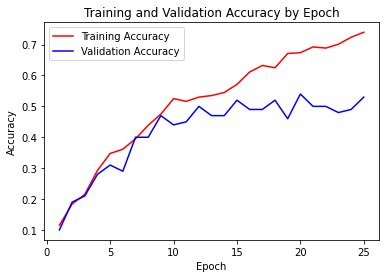

<Figure size 432x288 with 0 Axes>

In [103]:
acc = model_1.history['accuracy']
val_acc = model_1.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

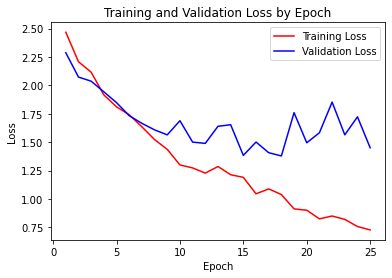

<Figure size 432x288 with 0 Axes>

In [121]:
loss = model_1.history['loss']
val_loss = model_1.history['val_loss']
epochs = range(1, 26)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

In [108]:
loss,acc = model1.evaluate_generator(test_generator, verbose=0)
print('Accuracy: ', acc)
print('Loss: ', loss)

Accuracy:  0.6200000047683716
Loss:  1.1621273756027222


In [145]:
# Defining Genres
genres = {
    0: 'blues',
    1: 'classical',
    2: 'country', 
    3: 'disco',
    4: 'hiphop', 
    5: 'jazz',
    6: 'metal',
    7: 'pop',
    8: 'reggae',
    9: 'rock'
}

In [146]:
predict1 = model1.predict(test_generator, verbose=1)
for i in range(10): 
    print(f'{i}: {sum([1 for prediction in predict1 if np.argmax(prediction) == i])}')

2/2 [==============================] - 1s 464ms/step
0: 15
1: 9
2: 14
3: 7
4: 12
5: 7
6: 10
7: 12
8: 6
9: 8


In [147]:
y_pred = np.argmax(predict1, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(test_generator.classes, y_pred)
#print(conf_matrix)
confusion_df = pd.DataFrame(conf_matrix)
#print(confusion_df)

Confusion Matrix


In [117]:
# Renaming rows and columns with labes
confusion_df = confusion_df.rename(columns=genres)
confusion_df.index = confusion_df.columns
confusion_df

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,1,0,1,0,1,1,2,1,2,1
classical,0,0,3,2,0,1,2,1,1,0
country,0,1,3,0,2,0,2,1,0,1
disco,1,1,0,1,2,0,1,3,0,1
hiphop,3,0,1,0,1,0,1,2,0,2
jazz,2,2,1,1,0,1,0,1,1,1
metal,1,1,2,1,2,1,0,0,1,1
pop,1,1,1,1,1,2,1,1,0,1
reggae,1,2,1,1,3,0,0,1,1,0
rock,5,1,1,0,0,1,1,1,0,0


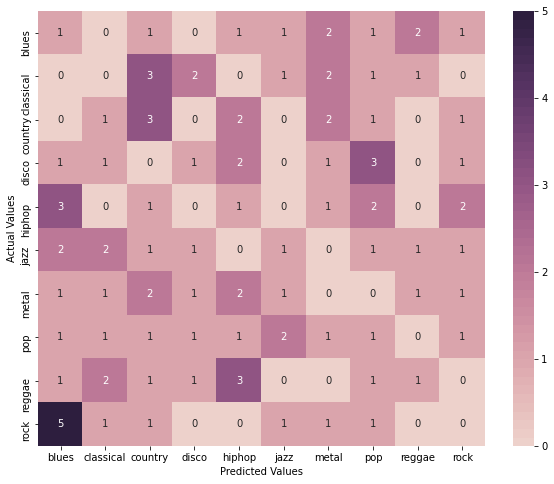

In [118]:
plt.figure(figsize= (10,8))
#sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

## Using SGD as the optimizer

In [29]:
# We have used MaxPooling in this architecture to cut down on our computation time

model2 = tf.keras.models.Sequential([
    # First CNN layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second CNN layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third CNN layer
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth CNN layer
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # We will now flatten our outputs from the previous layers to feed into a subsequent dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), # we have kept the droupout at 50% itself
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [30]:
model2.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 256)      

In [32]:
model_2 = model2.fit(training_generator,
                    epochs = 25,
                    validation_data=validation_generator)

Epoch 1/25
13/13 [==============================] - 34s 3s/step - loss: 2.3080 - accuracy: 0.1013 - val_loss: 2.3018 - val_accuracy: 0.1000
Epoch 2/25
13/13 [==============================] - 39s 3s/step - loss: 2.3044 - accuracy: 0.0913 - val_loss: 2.3002 - val_accuracy: 0.1000
Epoch 3/25
13/13 [==============================] - 43s 3s/step - loss: 2.3019 - accuracy: 0.1037 - val_loss: 2.2988 - val_accuracy: 0.1400
Epoch 4/25
13/13 [==============================] - 46s 4s/step - loss: 2.3006 - accuracy: 0.1088 - val_loss: 2.2972 - val_accuracy: 0.1000
Epoch 5/25
13/13 [==============================] - 39s 3s/step - loss: 2.2979 - accuracy: 0.1300 - val_loss: 2.2955 - val_accuracy: 0.2300
Epoch 6/25
13/13 [==============================] - 39s 3s/step - loss: 2.2970 - accuracy: 0.1200 - val_loss: 2.2941 - val_accuracy: 0.2300
Epoch 7/25
13/13 [==============================] - 42s 3s/step - loss: 2.2986 - accuracy: 0.1200 - val_loss: 2.2927 - val_accuracy: 0.2400
Epoch 8/25
13/13 [==

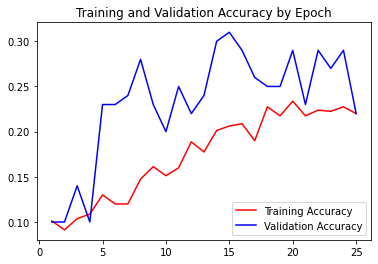

<Figure size 432x288 with 0 Axes>

In [119]:
acc = model_2.history['accuracy']
val_acc = model_2.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy by Epoch')
plt.legend()
plt.figure()
plt.show()

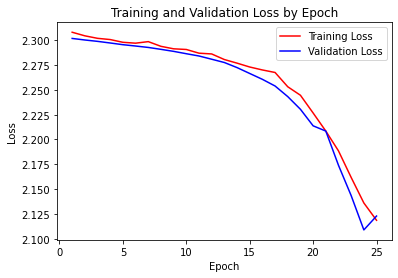

<Figure size 432x288 with 0 Axes>

In [122]:
loss = model_2.history['loss']
val_loss = model_2.history['val_loss']
epochs = range(1, 26)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

In [124]:
loss, acc = model2.evaluate_generator(test_generator, verbose=0)
print('Accuracy: ', acc)
print('Loss: ', loss)

Accuracy:  0.20999999344348907
Loss:  2.0801424980163574


In [148]:
predict2 = model2.predict(test_generator, verbose=1)
for i in range(10): 
    print(f'{i}: {sum([1 for prediction in predict2 if np.argmax(prediction) == i])}')

2/2 [==============================] - 0s 220ms/step
0: 0
1: 10
2: 2
3: 8
4: 2
5: 19
6: 39
7: 1
8: 0
9: 19


In [149]:
y_pred = np.argmax(predict2, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(test_generator.classes, y_pred)
#print(conf_matrix)
confusion_df = pd.DataFrame(conf_matrix)
#print(confusion_df)

Confusion Matrix


In [128]:
# Renaming rows and columns with lables
confusion_df = confusion_df.rename(columns=genres)
confusion_df.index = confusion_df.columns
confusion_df

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,0,1,1,1,0,2,2,0,0,3
classical,0,1,0,0,1,3,4,0,0,1
country,0,0,1,0,0,3,4,0,0,2
disco,0,1,0,1,0,2,5,1,0,0
hiphop,0,0,0,0,0,3,3,0,0,4
jazz,0,2,0,1,0,1,3,0,0,3
metal,0,1,0,2,1,1,4,0,0,1
pop,0,2,0,2,0,1,4,0,0,1
reggae,0,1,0,0,0,3,5,0,0,1
rock,0,1,0,1,0,0,5,0,0,3


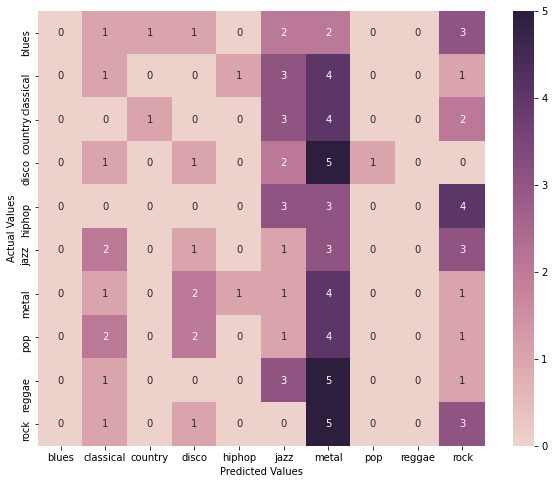

In [129]:
plt.figure(figsize= (10,8))
#sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

## Decreasing layers, but increasing neurons in the last layer and decreasing dropout

In [35]:
# We have used MaxPooling & Adam in this architecture to cut down on our computation time

model3 = tf.keras.models.Sequential([
    # First CNN layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second CNN layer
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third CNN layer
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # We will now flatten our outputs from the previous layers to feed into a subsequent dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2), # we have kept the droupout at 20% this time
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [36]:
model3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 256)       295168    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 512)       1180160   
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 512)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 147968)           

In [38]:
model_3 = model3.fit(training_generator,
                    epochs = 25,
                    validation_data=validation_generator)

Epoch 1/25
13/13 [==============================] - 57s 4s/step - loss: 3.9453 - accuracy: 0.0975 - val_loss: 2.2878 - val_accuracy: 0.1800
Epoch 2/25
13/13 [==============================] - 58s 4s/step - loss: 2.1814 - accuracy: 0.1750 - val_loss: 2.0999 - val_accuracy: 0.2000
Epoch 3/25
13/13 [==============================] - 64s 5s/step - loss: 1.9914 - accuracy: 0.2412 - val_loss: 2.0528 - val_accuracy: 0.2000
Epoch 4/25
13/13 [==============================] - 64s 5s/step - loss: 1.9014 - accuracy: 0.3088 - val_loss: 1.9184 - val_accuracy: 0.3700
Epoch 5/25
13/13 [==============================] - 67s 5s/step - loss: 1.7039 - accuracy: 0.3613 - val_loss: 1.8344 - val_accuracy: 0.3500
Epoch 6/25
13/13 [==============================] - 69s 5s/step - loss: 1.5515 - accuracy: 0.4363 - val_loss: 1.7923 - val_accuracy: 0.3700
Epoch 7/25
13/13 [==============================] - 67s 5s/step - loss: 1.4900 - accuracy: 0.4625 - val_loss: 1.8524 - val_accuracy: 0.4000
Epoch 8/25
13/13 [==

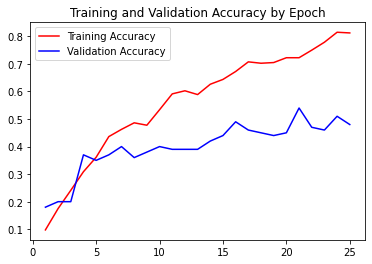

<Figure size 432x288 with 0 Axes>

In [130]:
acc = model_3.history['accuracy']
val_acc = model_3.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy by Epoch')
plt.legend()
plt.figure()
plt.show()

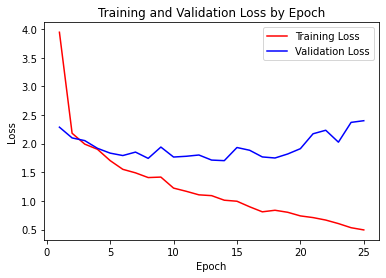

<Figure size 432x288 with 0 Axes>

In [131]:
loss = model_3.history['loss']
val_loss = model_3.history['val_loss']
epochs = range(1, 26)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

In [132]:
loss, acc = model3.evaluate_generator(test_generator, verbose=0)
print('Accuracy: ', acc)
print('Loss: ', loss)

Accuracy:  0.5400000214576721
Loss:  1.5494412183761597


In [198]:
predict3 = model3.predict(test_generator, verbose=1)
for i in range(10): 
    print(f'{i}: {sum([1 for prediction in predict3 if np.argmax(prediction) == i])}')

2/2 [==============================] - 1s 442ms/step
0: 23
1: 11
2: 6
3: 5
4: 5
5: 11
6: 4
7: 10
8: 14
9: 11


In [151]:
y_pred = np.argmax(predict3, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(test_generator.classes, y_pred)
#print(conf_matrix)
confusion_df = pd.DataFrame(conf_matrix)
#print(confusion_df)

Confusion Matrix


In [136]:
# Renaming rows and columns with lables
confusion_df = confusion_df.rename(columns=genres)
confusion_df.index = confusion_df.columns
confusion_df

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,4,1,0,0,1,0,0,3,0,1
classical,4,1,1,0,0,1,0,0,2,1
country,1,1,2,1,0,0,0,1,0,4
disco,0,2,0,1,0,1,1,2,3,0
hiphop,3,0,0,1,1,0,0,2,3,0
jazz,2,1,0,1,0,1,2,0,3,0
metal,3,0,0,0,1,3,0,1,0,2
pop,1,3,2,0,1,2,0,0,1,0
reggae,3,2,1,1,0,0,0,1,0,2
rock,2,0,0,0,1,3,1,0,2,1


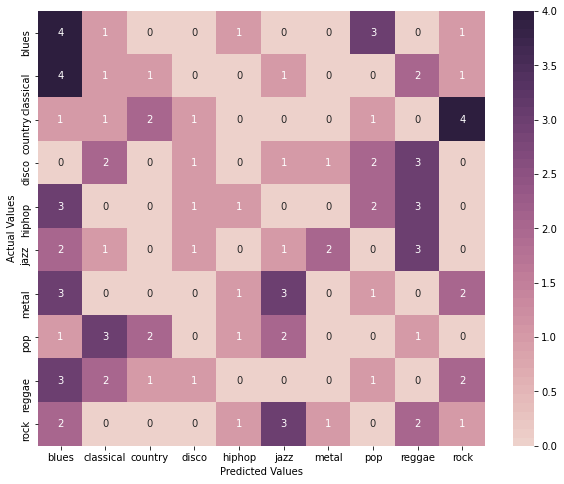

In [137]:
plt.figure(figsize= (10,8))
#sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

## Increasing number of Neurons and Layers, changing optimizer to RMSProp

In [41]:
# We have used MaxPooling in this architecture to cut down on our computation time

model4 = tf.keras.models.Sequential([
    # First CNN layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second CNN layer
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third CNN layer
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth CNN layer
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # We will now flatten our outputs from the previous layers to feed into a subsequent dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), # we have kept the droupout at 50% itself this time
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [42]:
model4.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 72, 256)       295168    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 34, 34, 512)       1180160   
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 17, 17, 512)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 1024)     

In [44]:
model_4 = model4.fit(training_generator,
                    epochs = 25,
                    validation_data=validation_generator)

Epoch 1/25
13/13 [==============================] - 79s 6s/step - loss: 13.3897 - accuracy: 0.1175 - val_loss: 2.3005 - val_accuracy: 0.1000
Epoch 2/25
13/13 [==============================] - 89s 7s/step - loss: 2.3626 - accuracy: 0.1300 - val_loss: 2.3022 - val_accuracy: 0.1000
Epoch 3/25
13/13 [==============================] - 91s 7s/step - loss: 2.2571 - accuracy: 0.1475 - val_loss: 2.1198 - val_accuracy: 0.1700
Epoch 4/25
13/13 [==============================] - 90s 7s/step - loss: 2.3363 - accuracy: 0.1550 - val_loss: 2.1447 - val_accuracy: 0.1800
Epoch 5/25
13/13 [==============================] - 90s 7s/step - loss: 2.1771 - accuracy: 0.1688 - val_loss: 2.0896 - val_accuracy: 0.2200
Epoch 6/25
13/13 [==============================] - 91s 7s/step - loss: 2.1999 - accuracy: 0.1713 - val_loss: 2.0868 - val_accuracy: 0.1700
Epoch 7/25
13/13 [==============================] - 92s 7s/step - loss: 2.2215 - accuracy: 0.2100 - val_loss: 2.1524 - val_accuracy: 0.1500
Epoch 8/25
13/13 [=

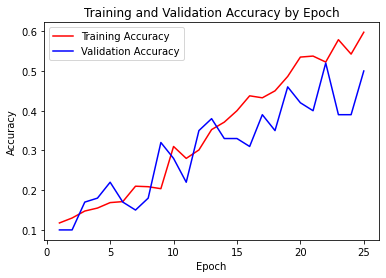

<Figure size 432x288 with 0 Axes>

In [138]:
acc = model_4.history['accuracy']
val_acc = model_4.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

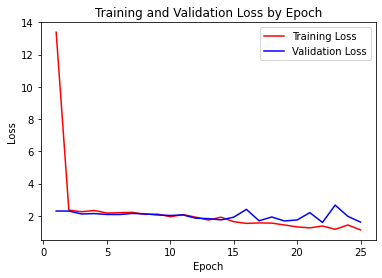

<Figure size 432x288 with 0 Axes>

In [139]:
loss = model_4.history['loss']
val_loss = model_4.history['val_loss']
epochs = range(1, 26)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

In [140]:
loss,acc = model4.evaluate_generator(test_generator, verbose=0)
print('Accuracy: ', acc)
print('Loss: ', loss)

Accuracy:  0.5400000214576721
Loss:  1.4418301582336426


In [141]:
predict4 = model4.predict(test_generator, verbose=1)
for i in range(10): 
    print(f'{i}: {sum([1 for prediction in predict4 if np.argmax(prediction) == i])}')

2/2 [==============================] - 1s 504ms/step
0: 2
1: 9
2: 16
3: 26
4: 15
5: 3
6: 8
7: 12
8: 9
9: 0


In [142]:
y_pred = np.argmax(predict4, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(test_generator.classes, y_pred)
#print(conf_matrix)
confusion_df = pd.DataFrame(conf_matrix)
#print(confusion_df)

Confusion Matrix


In [143]:
# Renaming rows and columns with labes
confusion_df = confusion_df.rename(columns=genres)
confusion_df.index = confusion_df.columns
confusion_df

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,0,1,2,3,2,1,0,0,1,0
classical,0,1,0,3,2,0,2,0,2,0
country,0,0,1,2,3,1,0,1,2,0
disco,0,0,2,4,2,0,0,2,0,0
hiphop,1,2,2,2,1,0,0,1,1,0
jazz,0,2,3,2,0,1,1,1,0,0
metal,0,2,4,0,1,0,1,2,0,0
pop,0,0,0,1,1,0,3,4,1,0
reggae,0,1,0,6,1,0,0,1,1,0
rock,1,0,2,3,2,0,1,0,1,0


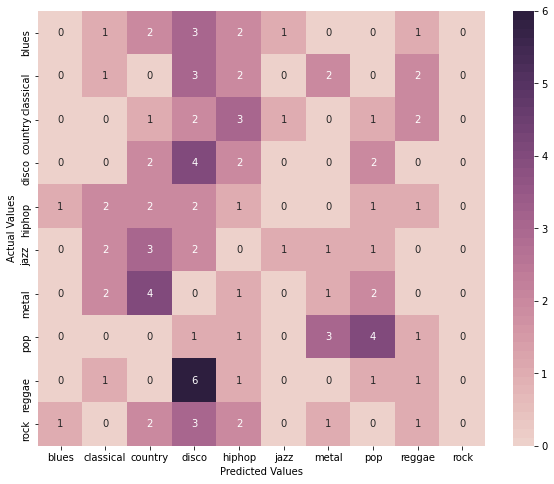

In [144]:
plt.figure(figsize= (10,8))
#sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

## More neurons, more layers and Adam optimizer

In [155]:
# We have used MaxPooling in this architecture to cut down on our computation time

model5 = tf.keras.models.Sequential([
    # First CNN layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second CNN layer
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third CNN layer
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth CNN layer
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # We will now flatten our outputs from the previous layers to feed into a subsequent dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), # we have kept the droupout at 50% itself this time
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [156]:
model5.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [157]:
model5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 72, 72, 256)       295168    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 34, 34, 512)       1180160   
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 17, 17, 512)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 15, 15, 1024)     

In [158]:
model_5 = model5.fit(training_generator,
                    epochs = 25,
                    validation_data=validation_generator)

Epoch 1/25
13/13 [==============================] - 90s 7s/step - loss: 2.6276 - accuracy: 0.0712 - val_loss: 2.3022 - val_accuracy: 0.1000
Epoch 2/25
13/13 [==============================] - 81s 6s/step - loss: 2.2940 - accuracy: 0.1125 - val_loss: 2.2376 - val_accuracy: 0.1700
Epoch 3/25
13/13 [==============================] - 80s 6s/step - loss: 2.1578 - accuracy: 0.1937 - val_loss: 2.1610 - val_accuracy: 0.1500
Epoch 4/25
13/13 [==============================] - 81s 6s/step - loss: 2.0366 - accuracy: 0.2237 - val_loss: 2.1086 - val_accuracy: 0.2300
Epoch 5/25
13/13 [==============================] - 80s 6s/step - loss: 1.9313 - accuracy: 0.2900 - val_loss: 2.0019 - val_accuracy: 0.2400
Epoch 6/25
13/13 [==============================] - 80s 6s/step - loss: 1.7819 - accuracy: 0.3413 - val_loss: 1.8857 - val_accuracy: 0.3300
Epoch 7/25
13/13 [==============================] - 80s 6s/step - loss: 1.7060 - accuracy: 0.3363 - val_loss: 1.8662 - val_accuracy: 0.3700
Epoch 8/25
13/13 [==

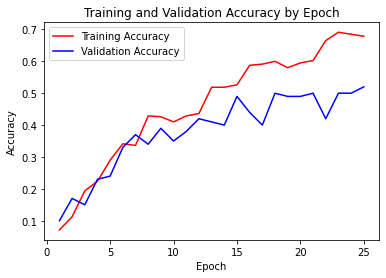

<Figure size 432x288 with 0 Axes>

In [159]:
acc = model_5.history['accuracy']
val_acc = model_5.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

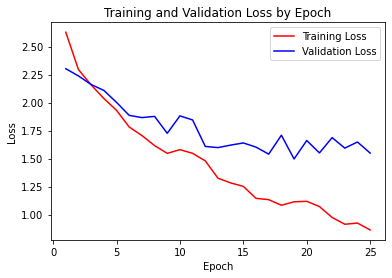

<Figure size 432x288 with 0 Axes>

In [160]:
loss = model_5.history['loss']
val_loss = model_5.history['val_loss']
epochs = range(1, 26)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

In [161]:
loss,acc = model5.evaluate_generator(test_generator, verbose=0)
print('Accuracy: ', acc)
print('Loss: ', loss)

Accuracy:  0.6899999976158142
Loss:  1.0458883047103882


In [162]:
predict5 = model5.predict(test_generator, verbose=1)
for i in range(10): 
    print(f'{i}: {sum([1 for prediction in predict4 if np.argmax(prediction) == i])}')

2/2 [==============================] - 1s 502ms/step
0: 2
1: 9
2: 16
3: 26
4: 15
5: 3
6: 8
7: 12
8: 9
9: 0


In [163]:
y_pred = np.argmax(predict4, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(test_generator.classes, y_pred)
#print(conf_matrix)
confusion_df = pd.DataFrame(conf_matrix)
#print(confusion_df)

Confusion Matrix


In [164]:
# Renaming rows and columns with labes
confusion_df = confusion_df.rename(columns=genres)
confusion_df.index = confusion_df.columns
confusion_df

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,0,1,2,3,2,1,0,0,1,0
classical,0,1,0,3,2,0,2,0,2,0
country,0,0,1,2,3,1,0,1,2,0
disco,0,0,2,4,2,0,0,2,0,0
hiphop,1,2,2,2,1,0,0,1,1,0
jazz,0,2,3,2,0,1,1,1,0,0
metal,0,2,4,0,1,0,1,2,0,0
pop,0,0,0,1,1,0,3,4,1,0
reggae,0,1,0,6,1,0,0,1,1,0
rock,1,0,2,3,2,0,1,0,1,0


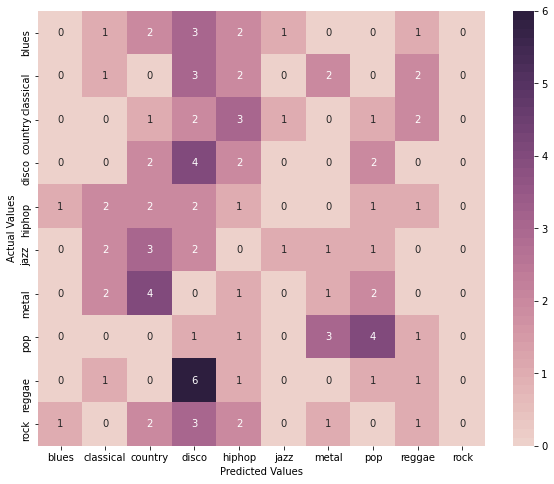

In [165]:
plt.figure(figsize= (10,8))
#sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

## Using a pretrained model(VGG16)

In [45]:
vgg16_model = tf.keras.applications.vgg16.VGG16(input_shape=(150,150,3), 
                                                    include_top=False,  # Loads only convolutional layers, not the dense layers on top
                                                    weights='imagenet'  # Loads weights from imagenet
                                                    )

58892288/58889256 [==============================] - 4s 0us/step


In [46]:
for layer in vgg16_model.layers:
    layer.trainable = False

In [47]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [48]:
vgg16_model_block5_pool = vgg16_model.get_layer('block5_pool')

In [49]:
vgg16_model_output = vgg16_model_block5_pool.output

In [50]:
# Flatten the output of the inception model
custom_dense_layer = tf.keras.layers.Flatten()(vgg16_model_output)

# Add a dense layer of 1024 neurons with relu activation

custom_dense_layer = tf.keras.layers.Dense(1024,activation='relu') (custom_dense_layer)

In [51]:
custom_dense_layer = tf.keras.layers.Dense(10,activation='softmax') (custom_dense_layer)

In [52]:
model = tf.keras.Model(vgg16_model.input,custom_dense_layer)

In [53]:
# compile with model

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
# Check out the summary

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [56]:
history = model.fit(
      training_generator,
      epochs=25,
      validation_data=validation_generator)

Epoch 1/25
13/13 [==============================] - 36s 3s/step - loss: 1.9163 - accuracy: 0.3325 - val_loss: 1.6607 - val_accuracy: 0.3900
Epoch 2/25
13/13 [==============================] - 38s 3s/step - loss: 1.4815 - accuracy: 0.5138 - val_loss: 1.4465 - val_accuracy: 0.4700
Epoch 3/25
13/13 [==============================] - 45s 3s/step - loss: 1.2803 - accuracy: 0.5800 - val_loss: 1.3739 - val_accuracy: 0.5100
Epoch 4/25
13/13 [==============================] - 42s 3s/step - loss: 1.1692 - accuracy: 0.5913 - val_loss: 1.3270 - val_accuracy: 0.4800
Epoch 5/25
13/13 [==============================] - 42s 3s/step - loss: 1.0684 - accuracy: 0.6488 - val_loss: 1.2828 - val_accuracy: 0.5100
Epoch 6/25
13/13 [==============================] - 42s 3s/step - loss: 0.9705 - accuracy: 0.6875 - val_loss: 1.2424 - val_accuracy: 0.5500
Epoch 7/25
13/13 [==============================] - 42s 3s/step - loss: 0.9122 - accuracy: 0.7225 - val_loss: 1.3601 - val_accuracy: 0.5100
Epoch 8/25
13/13 [==

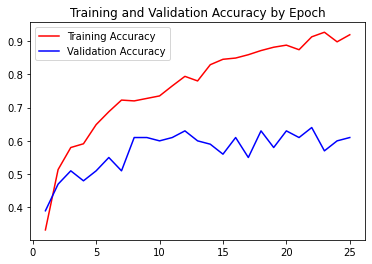

<Figure size 432x288 with 0 Axes>

In [167]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy by Epoch')
plt.legend()
plt.figure()
plt.show()

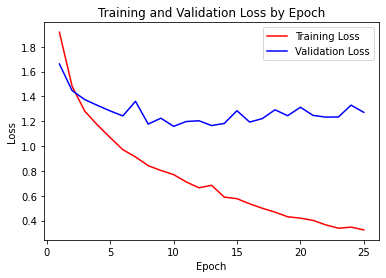

<Figure size 432x288 with 0 Axes>

In [166]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 26)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

In [63]:
loss, acc = model.evaluate_generator(test_generator)
print('Accuracy: ',acc)
print('loss: ', loss)

Accuracy:  0.699999988079071
loss:  0.9375866055488586


In [168]:
history1 = model.predict(test_generator, verbose=1)
for i in range(10): 
    print(f'{i}: {sum([1 for prediction in history1 if np.argmax(prediction) == i])}')

2/2 [==============================] - 1s 676ms/step
0: 4
1: 12
2: 6
3: 9
4: 14
5: 14
6: 12
7: 10
8: 9
9: 10


In [169]:
y_pred = np.argmax(predict4, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(test_generator.classes, y_pred)
#print(conf_matrix)
confusion_df = pd.DataFrame(conf_matrix)
#print(confusion_df)

Confusion Matrix


In [170]:
# Renaming rows and columns with labes
confusion_df = confusion_df.rename(columns=genres)
confusion_df.index = confusion_df.columns
confusion_df

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,0,1,2,3,2,1,0,0,1,0
classical,0,1,0,3,2,0,2,0,2,0
country,0,0,1,2,3,1,0,1,2,0
disco,0,0,2,4,2,0,0,2,0,0
hiphop,1,2,2,2,1,0,0,1,1,0
jazz,0,2,3,2,0,1,1,1,0,0
metal,0,2,4,0,1,0,1,2,0,0
pop,0,0,0,1,1,0,3,4,1,0
reggae,0,1,0,6,1,0,0,1,1,0
rock,1,0,2,3,2,0,1,0,1,0


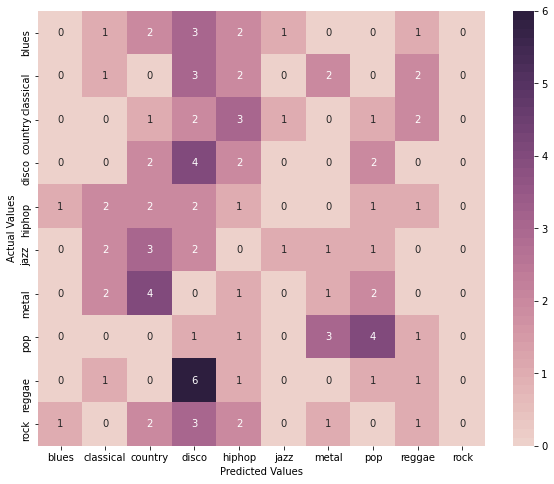

In [171]:
plt.figure(figsize= (10,8))
#sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');